In [1]:
# written by Kevin Chow

In [2]:
# import libraries

import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load Oracle database details

f = open("oracle.txt","r")
if f.mode == 'r':
    oracleString = f.read()
    oracleStringNew = oracleString.replace('@','/')
    oracleVariables = oracleStringNew.split('/')    

In [4]:
# create variables

USERNAME = oracleVariables[0]
USERPWD = oracleVariables[1]
HOSTNAME = oracleVariables[2]
DBNAME = oracleVariables[3]

In [5]:
# try to create a Oracle database connection

try:
    # connection = cx_Oracle.connect("USERNAME/USERPWD@HOSTNAME/DBNAME")
    connection = cx_Oracle.connect(USERNAME, USERPWD, HOSTNAME + "/" + DBNAME, encoding = "UTF-8")
except Exception as errConnection:
    print("Error while creating a connection: ", errConnection)

In [6]:
# try to create a cursor

try:
    cur = connection.cursor()
except Exception as errCurCreate:
    print("Error while creating a cursor: ", errCurCreate)

In [7]:
# fetching price of Apple Inc.

sql = """
        SELECT PRICE_DATE, CLOSE FROM SA_PRICES 
        WHERE SECNAME = 'AAPL'
        AND EXTRACT(YEAR FROM PRICE_DATE) = 2020
        """

cur.execute(sql)
mx = cur.fetchall()
mx = tuple(zip(*mx))
df = pd.DataFrame(data=mx[1], index=mx[0], columns=['AAPL'])

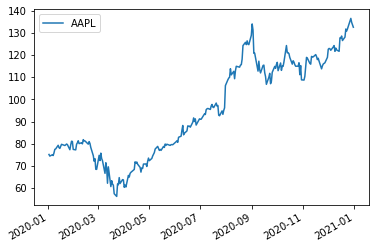

In [8]:
# plot a graph

plt.close("all")
df.plot()
plt.show()

In [9]:
# try to close the cursor

try:
    cur.close()
except Exception as errCurClose:
    print("Error while closing a cursor: ", errCurClose)

In [10]:
# try to close the Oracle database connection

try:
    connection.close()
except Exception as errConnectionClose:
    print("Error while closing a connection: ", errConnectionClose)